## Data import

In [130]:
import numpy as np
import seaborn as sb
import keras
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [131]:
(X_train,y_train), ( X_test, y_test) = keras.datasets.mnist.load_data()


In [132]:
X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000,784))

For better work, I reduced the data by 75%

In [133]:
X_train = X_train[:5000][:]
X_test = X_test[:750][:]
y_train = y_train[:5000]
y_test = y_test[:750]

## Training models

### Selecting classifiers

In [134]:
models = {
    'knn': KNeighborsClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'svc': SVC(),
    'mlp': MLPClassifier(),
    'bayes': GaussianNB()
}

In [135]:
names_models = {
    'knn': 'KNeighborsClassifier',
    'decision_tree': 'DecisionTreeClassifier',
    'random_forest': 'RandomForestClassifier',
    'svc': 'SVC',
    'mlp': 'MLPClassifier',
    'bayes': 'GaussianNB'
}

### Training classifiers

In [136]:
accuracies = []
classifiers = []
for i in models:
    clf = models[i].fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(f'Accuracy {names_models[i]} = {accuracy_score(y_test, y_predict)}')
    accuracies.append(accuracy)
    classifiers.append(names_models[i])

Accuracy KNeighborsClassifier = 0.908
Accuracy DecisionTreeClassifier = 0.7546666666666667
Accuracy RandomForestClassifier = 0.9266666666666666
Accuracy SVC = 0.936
Accuracy MLPClassifier = 0.8466666666666667
Accuracy GaussianNB = 0.5573333333333333


### Plot results

In [137]:
dataframe = pd.DataFrame({
    'Classifiers': classifiers,
    'Accuracies':accuracies
})

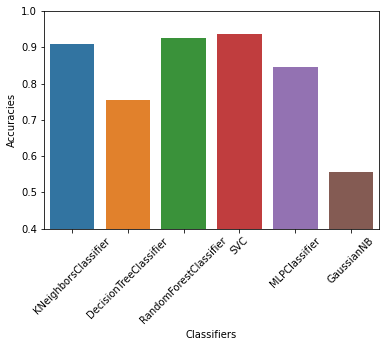

In [138]:
ax = sb.barplot(data=dataframe, x='Classifiers', y='Accuracies')
ax.set(ylim=(0.4,1))
ax.tick_params(axis='x', rotation=45)

<p> As expected, Decision Tree and Naive Bayes classifiers are much less accurate than other classifiers.
<p> Now let's try to improve other classifiers
<p> SVC and MLP are responsible for ​​80% of the execution time

## Improve classifiers

### Filtering the best classifiers and setting parameters

In [139]:
models = {
    'knn': KNeighborsClassifier(),
    'random_forest': RandomForestClassifier(),
    'svc': SVC(),
    'mlp': MLPClassifier()
}

In [140]:
params = {
    'knn': {'n_neighbors':[1,3,5,7]},
    'random_forest': {'criterion': ['gini','entropy'], 'n_estimators':[50,100,150,200]},
    'svc': {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale','auto'], 'degree':[2,3,4]},
    'mlp': {'solver':['sgd', 'adam'], 'hidden_layer_sizes':[(100,), (50,50), (100,50)], 'max_iter':[1000]},
}

### Randomized Search for best models in prev section

In [141]:
best_accuracy = 0

for i in models:
    clf = RandomizedSearchCV(models[i], params[i], n_iter=4).fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(f'Accuracy {names_models[i]} = {accuracy_score(y_test, y_predict)}')
    print(f'Best params {clf.best_params_}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = clf

Accuracy KNeighborsClassifier = 0.9026666666666666
Best params {'n_neighbors': 1}
Accuracy RandomForestClassifier = 0.932
Best params {'n_estimators': 200, 'criterion': 'gini'}
Accuracy SVC = 0.9386666666666666
Best params {'kernel': 'poly', 'gamma': 'scale', 'degree': 2}
Accuracy MLPClassifier = 0.864
Best params {'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (100,)}


## Normalizing and standardizing best classifier

In [142]:
accuracies = [best_accuracy]
classifiers = ['Unchanged', 'Normalized', 'Standardized']

### Normalizing

In [143]:
X_train_normalized = Normalizer().fit(X_train).transform(X_train)
X_test_normalized = Normalizer().fit(X_test).transform(X_test)

In [144]:
clf = best_classifier.best_estimator_
clf.fit(X_train_normalized, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test_normalized))
print(f'Accuracy with data normalized {accuracy}')
accuracies.append(accuracy)


Accuracy with data normalized 0.9466666666666667


### Standardizing

In [145]:
X_train_standardizing =StandardScaler().fit(X_train).transform(X_train)
X_test_standardizing = StandardScaler().fit(X_test).transform(X_test)

In [146]:
clf = best_classifier.best_estimator_
clf.fit(X_train_standardizing, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test_standardizing))
print(f'Accuracy with data standardized {accuracy}')
accuracies.append(accuracy)

Accuracy with data standardized 0.9066666666666666


### Plot results

In [147]:
dataframe = pd.DataFrame({
    'Classifiers': classifiers,
    'Accuracies':accuracies
})

[(0.5, 0.98)]

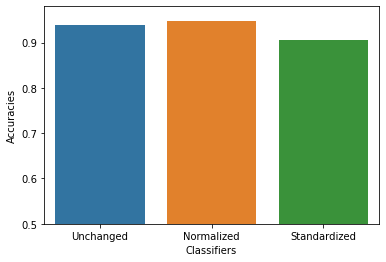

In [148]:
ax = sb.barplot(data=dataframe, x='Classifiers', y='Accuracies')
ax.set(ylim=(0.5,0.98))

In this example, the normalization affected the accuracy result, being very interesting to implement it. Regarding standardization, it may not bring satisfactory results, sometimes it may even decrease the accuracy value.

## Kmeans

In [149]:
clf = KMeans(n_clusters=10).fit(X_train)

In [150]:
y_predict = clf.predict(X_test)

<AxesSubplot:ylabel='count'>

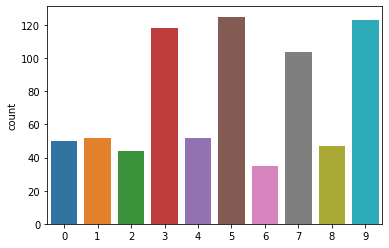

In [151]:
sb.countplot(x=y_predict)

The dataset with many classes is quite complicated to identify the real class.

## TSNE

In [155]:
X_embedded = TSNE().fit_transform(X_train)

In [178]:
df = pd.DataFrame(X_embedded)
for i in df:
    print(i)

0
1


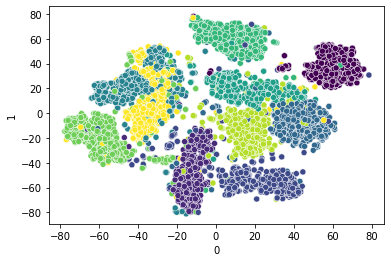

In [188]:
ax = sb.scatterplot(data=df, x=0, y=1, c=y_train)

With TSNE 